# Final Solution Training & Visualization

 ---
 
## Prepare Workspace

In [44]:
from os.path import join, exists
from random import choice

import matplotlib.pyplot as plt
from joblib import dump
from numpy import sqrt, abs
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [33]:
DATA_ROOT = join('..', 'data')
MODELS_ROOT = join('..', 'models')
INTERIM_DATA_ROOT = join(DATA_ROOT, 'interim')
FIGURES_DIR = join('..', 'reports', 'figures')
PREPROCESSED_FILE_PATH = join(INTERIM_DATA_ROOT, 'transformed_data.csv')
MODEL_PATH = join(MODELS_ROOT, 'RFR_model.joblib')

DROP_COLUMNS = ['user_id', 'movie_id', 'rating', 'title']
TEST_DATA_SIZE = 0.2

RANDOM_SEED = 42
FIG_SIZE = (6, 6)
NUMBER_OF_TREES = 200

 ---
 
## Prepare Data

In [34]:
data = read_csv(PREPROCESSED_FILE_PATH)

In [35]:
X = data.drop(DROP_COLUMNS, axis=1)
y = data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_DATA_SIZE, random_state=RANDOM_SEED)

 ---
 
## Prepare Model

In [36]:
model = RandomForestRegressor(n_estimators=NUMBER_OF_TREES, random_state=RANDOM_SEED)

In [37]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [38]:
print(f'New model saved on: {dump(model, MODEL_PATH)}')

New model saved on: ['..\\models\\RFR_model.joblib']


 ---
 
## Predict & Evaluate

In [39]:
predicted_ratings = model.predict(X_test)

In [40]:
rmse = sqrt(mean_squared_error(y_test, predicted_ratings))

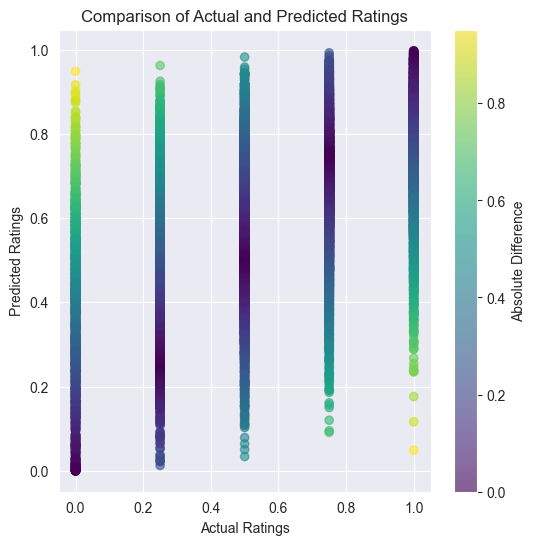

Root Mean Squared Error: 0.2339


In [41]:
plt.figure(figsize=FIG_SIZE)

difference = abs(y_test - predicted_ratings)
plt.scatter(y_test, predicted_ratings, c=difference, cmap='viridis', alpha=0.6)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.colorbar(label='Absolute Difference')

title = f'Comparison of Actual and Predicted Ratings'
plt.title(title)
save_path = join(FIGURES_DIR, title)
if not exists(save_path):
    plt.savefig(save_path, bbox_inches='tight')

plt.show()
print(f'Root Mean Squared Error: {rmse:.4f}')

In [42]:
def recommend_movies(user_id, _data, _model, top_n=5):
    user_data = _data[_data['user_id'] == user_id]
    watched_movie_ids = user_data['movie_id'].unique()

    potential_movies = _data[~_data['movie_id'].isin(watched_movie_ids)].drop_duplicates('movie_id')
    potential_movies['predicted_rating'] = _model.predict(potential_movies.drop(DROP_COLUMNS, axis=1))
    top_recommendations = potential_movies.sort_values(by='predicted_rating', ascending=False).head(top_n)

    return top_recommendations[['title', 'predicted_rating']]

In [45]:
random_user = choice(data['user_id'].unique())
recommended_movies = recommend_movies(random_user, data, model)
print(recommended_movies)

                                      title  predicted_rating
59337                     Casablanca (1942)           0.99000
62736          To Kill a Mockingbird (1962)           0.98625
51704  Saint of Fort Washington, The (1993)           0.98500
99835                        Everest (1998)           0.98375
98438                    Prefontaine (1997)           0.98125
